# Day 31

## Support Vector Machine and Classifiers

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm
import numpy as np
import pandas as pd

In [0]:
def plot_boundaries(df, y, est=None, xlbl="", ylbl="", t=""):
    
    x_min, x_max = df.values[:, 0].min() - 1, df.values[:, 0].max() + 1
    y_min, y_max = df.values[:, 1].min() - 1, df.values[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 1, 1)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(df.values[:, 0], df.values[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xlim(xx.min(), xx.max())
    plt.title(t)
    plt.show()

In [0]:
iris = load_iris()
df_x = pd.DataFrame(load_iris()['data'][:, :2])
y = iris['target']

In [32]:
svc_model = svm.SVC()
svc_model.fit(df_x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# x_test = np.array([load_iris()['data'][0]])
# svc_model.predict(x_test)

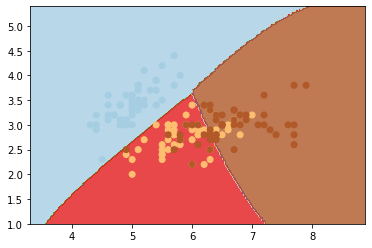

In [35]:
plot_boundaries(df_x, y, svc_model)

## Digit Clasification

In [0]:
from sklearn.datasets import load_digits
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

Sample image from data-set


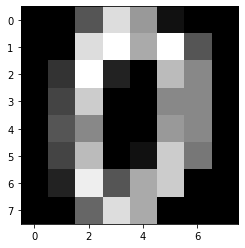

In [17]:
# Loading the data and previewing one image...
digits = load_digits()
i = digits['images'][0]

print("Sample image from data-set")
plt.imshow(i, cmap='gray')

In [51]:
# Preporcessing the data first...
# (Converting 2D data features to 1D Array)
sample_count = len(digits.images)
data = digits.images.reshape((sample_count, -1))
print("Flattened Date sample :\n", data[0])
print(data.shape)

Flattened Date sample :
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 64)


In [45]:
# saperating the test and train data sets...
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=False)

print("x_train Size:", x_train.shape)
print("y_train Size:", y_train.shape)

print("\nx_test Size:", x_test.shape)
print("x_test Size:", y_test.shape)

x_train Size: (1257, 64)
y_train Size: (1257,)

x_test Size: (540, 64)
x_test Size: (540,)


In [46]:
# Creating and fitting the Classifier model
classifier = svm.SVC(gamma=0.01)
classifier.fit(x_train, y_train)

# Getting model's score
classifier.score(x_test, y_test)

0.6962962962962963

Predicted number :  [2]


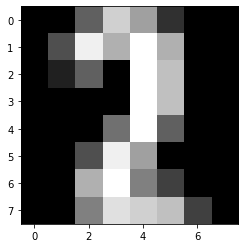

In [61]:
# Choosing some random digit from our dataset...
random_test = digits.images[152]
plt.imshow(random_test, cmap='gray')

# Passing same number to our model...
prediction = classifier.predict(random_test.reshape((1, -1)))
print("Predicted number : ", prediction)

Text(0.5, 0.98, 'Confusion Matrix')

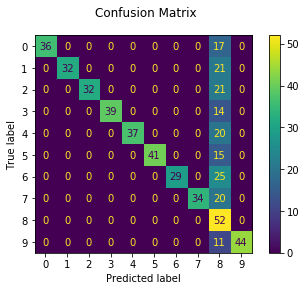

In [60]:
# Statistics of our model...
confusion = metrics.plot_confusion_matrix(classifier, x_test, y_test)
confusion.figure_.suptitle("Confusion Matrix")